# Disease prediction

In [1]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 2.0 EDA

In [2]:
#reading the data in

df = pd.read_csv("Cardio-data/cardio_train.csv")

In [3]:
#data checking 

#df.info()
#df.describe()

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# number of people with cardio 

df_cardio = pd.DataFrame(df[["cardio"]].value_counts()).rename(columns = {0:"Number of patients"})

print(f"Number of people WITH heart disease : {df_cardio[df_cardio.index == (1,)].values[0][0]}")
print(f"Number of people WITHOUT heart disease : {df_cardio[df_cardio.index == (0,)].values[0][0]}")


Number of people WITH heart disease : 34979
Number of people WITHOUT heart disease : 35021


Text(0.5, 1.0, 'Percentage of people by cholesterol type')

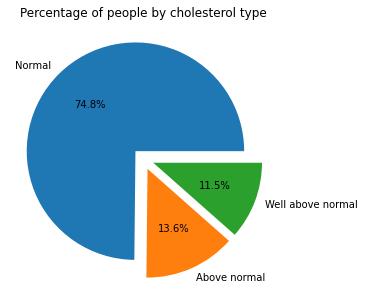

In [5]:
# number of people by cholesterol level
df_cholesterol = pd.DataFrame(df[["cholesterol"]].groupby("cholesterol").size()).rename(columns={0:"Number of people"}).reset_index()

plt.figure(figsize=(10,5))
plt.pie(df_cholesterol["Number of people"], 
            labels = ["Normal","Above normal","Well above normal"], 
            explode=(0.1, 0.1, 0.1),
            autopct='%1.1f%%'
            )
plt.title("Percentage of people by cholesterol type")

[Text(0.5, 1.0, 'Number of patients by age')]

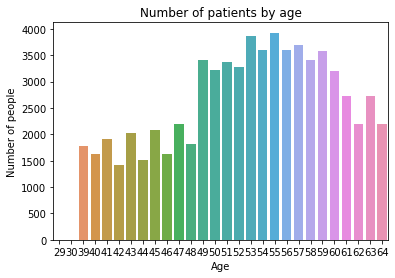

In [6]:
# Age distribution 

df_age = df["age"]//365 

df_age = pd.DataFrame(df_age.value_counts()).reset_index().rename(columns = {"index":"Age","age":"Number of people"}).sort_values("Age",ascending=True).reset_index(drop=True)

sns.barplot(data=df_age, 
                x="Age",
                y="Number of people"
            ).set(title="Number of patients by age")

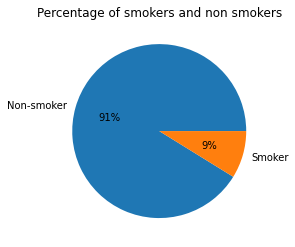

In [7]:
# Percentage of smokers 

df_smoke = df[["smoke"]].value_counts()

df_smoke = pd.DataFrame(df_smoke).reset_index().rename(columns = {0:"Number of patients"})
df_smoke["smoke"] = ["Non-smoker","Smoker"]

plt.pie(df_smoke["Number of patients"], 
            labels = df_smoke["smoke"],
            autopct='%.0f%%' 
            )
plt.title("Percentage of smokers and non smokers")
plt.show()

<AxesSubplot:xlabel='weight', ylabel='Number of patients'>

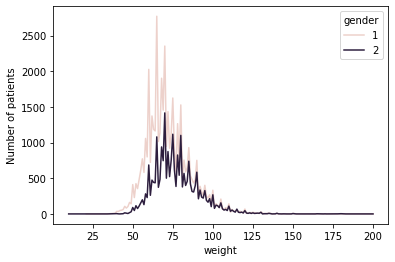

In [8]:
# Weight distribution 

df_weight = df[["weight","gender"]].astype("int32").groupby(["weight","gender"]).size()

df_weight = pd.DataFrame(df_weight).reset_index().rename(columns={0:"Number of patients"}).sort_values("weight",ascending=True).reset_index(drop=True)

sns.lineplot(data = df_weight, 
                x="weight", 
                y="Number of patients",
                hue="gender"
                )

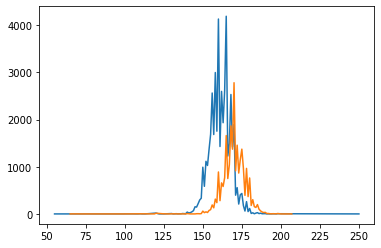

In [9]:
# Height distribution 

df_height = df_weight = df[["height","gender"]].astype("int32").groupby(["height","gender"]).size()

df_height = pd.DataFrame(df_height).reset_index().rename(columns={0:"Number of patients"}).sort_values("height",ascending=True).reset_index(drop=True)

plt.plot(df_height[df_height["gender"]==1]["height"],df_height[df_height["gender"]==1]["Number of patients"])
plt.plot(df_height[df_height["gender"]==2]["height"],df_height[df_height["gender"]==2]["Number of patients"])

#sns.lineplot(data = df_height, 
#                x="height", 
#                y="Number of patients",
#                hue="gender"
#                )

([<matplotlib.patches.Wedge at 0x7fbd0422fa60>,
 [Text(-0.018075891633365444, 1.099851472764236, 'Cardio'),
  Text(0.018075891633365555, -1.099851472764236, 'No Cardio')],
 [Text(-0.00985957725456297, 0.5999189851441287, '51%'),
  Text(0.00985957725456303, -0.5999189851441287, '49%')])

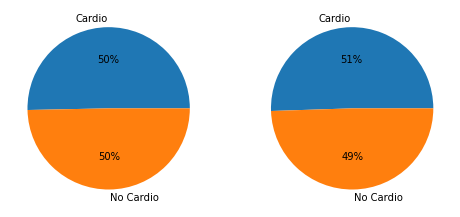

In [10]:
df_men_cardio = pd.DataFrame(df[df.gender == 1][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})
df_women_cardio = pd.DataFrame(df[df.gender == 2][["cardio"]].value_counts()).reset_index().rename(columns={0:"Number of patients"})

fig,ax = plt.subplots(1,2,figsize=(8,4))

ax[0].pie(df_men_cardio["Number of patients"],
            labels = ["Cardio","No Cardio"],
            autopct='%.0f%%' )

ax[1].pie(df_women_cardio["Number of patients"],
            labels = ["Cardio","No Cardio"],
            autopct='%.0f%%' )

# 2.1.0 Feature engineering : BMI 

In [11]:
# create BMI index

df_modified = df[:]
df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)

df_modified.head()

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_68648/875335930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified["BMI"]=df_modified["weight"]/((df_modified["height"]*0.01)**2)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [12]:
#cleaning unreal and extreme data 

df_modified = df_modified[ df_modified.BMI > 8 ]
df_modified.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000,69997.000000
mean,49972.089547,19468.831707,1.349544,164.358844,74.208256,128.816664,96.616412,1.366873,1.226453,0.088118,0.053759,0.803720,0.499693,27.557491
std,28851.641752,2467.287778,0.476829,8.210001,14.390684,154.014595,188.438397,0.680258,0.572274,0.283469,0.225544,0.397185,0.500003,6.089798
min,0.000000,10798.000000,1.000000,55.000000,21.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.001829
25%,25006.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50002.000000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.377898
75%,74889.000000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [13]:
df_modified["BMI Category"] = [ "normal range" if (X < 25 and X>18.4) 
                                                else ("overweight" if X<30 
                                                else ("obese (class I)" if X<35 
                                                else ("obese (class II)" if X<40 
                                                else ("obese (class III)" if X>=40 
                                                else "Under weight"))))
                                                for X in df_modified["BMI"] ]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range


# 2.1.1 Feature engineering : Blood pressure

In [14]:
df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]<0].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]<0].index)

df_modified = df_modified.drop(df_modified[df_modified["ap_lo"]>300].index)
df_modified = df_modified.drop(df_modified[df_modified["ap_hi"]>300].index)

df_modified["Blood pressure"] = [ "Healthy" if (i<120 and j<80) 
                                            else( "Elevated" if (i>=120 and i< 130  and j<80) 
                                            else( "Stage 1 hypertension" if ((i>=130 and i< 140)  or ( j<90  and j>=80))
                                            else( "Stage 2 hypertension" if ((i>=140 and i<=180)  or ( j<=120  and j>=90))
                                            else("Hypertension crisis" if i>180 or j>90
                                            else "Non classified")))) for i,j in zip(df_modified["ap_hi"],df_modified["ap_lo"])]

df_modified.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category,Blood pressure
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,normal range,Stage 1 hypertension
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,obese (class I),Stage 2 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,normal range,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,overweight,Stage 2 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,normal range,Healthy


# 2.2.0 Data visualization

/var/folders/q8/kg4v5mr16fv47tpsjyg28zlc0000gn/T/ipykernel_68648/501466190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio_age["age"]=df_cardio_age["age"]//365


<AxesSubplot:xlabel='gluc', ylabel='Number of patients'>

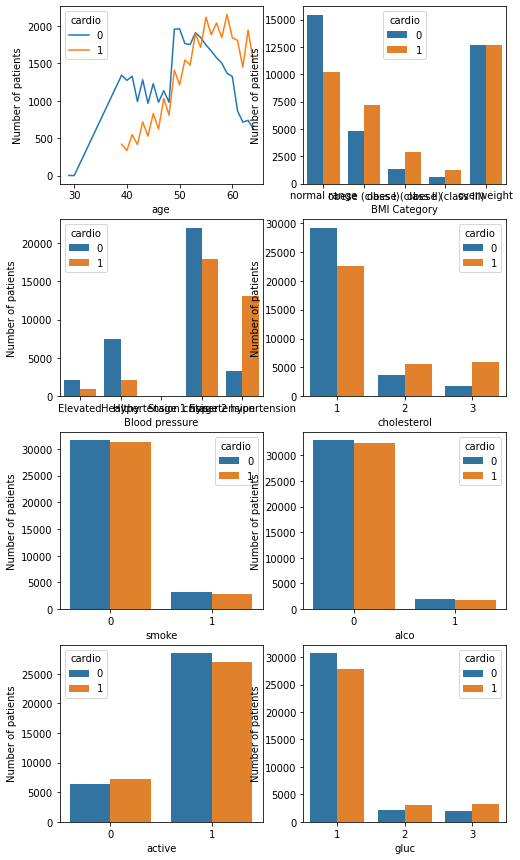

In [15]:
fig,ax = plt.subplots(4,2,figsize=(8,15))

# Cardio vs age 
df_cardio_age=df_modified[["cardio","age"]]
df_cardio_age["age"]=df_cardio_age["age"]//365
df_cardio_age = pd.DataFrame(df_cardio_age.groupby(["age","cardio"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.lineplot(x="age",y="Number of patients",data=df_cardio_age,hue="cardio",ax=ax[0,0])

# Cardio vs BMI 
df_cardio_BMI=pd.DataFrame(df_modified[["cardio","BMI Category"]].groupby(["cardio","BMI Category"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="BMI Category", y="Number of patients", data=df_cardio_BMI,hue="cardio",ax=ax[0,1])


# Cardio vs Blood pressure 
df_cardio_BP=pd.DataFrame(df_modified[["cardio","Blood pressure"]].groupby(["cardio","Blood pressure"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="Blood pressure", y="Number of patients", data=df_cardio_BP,hue="cardio",ax=ax[1,0])


# Cardio vs Cholesterol type 
df_cardio_CT=pd.DataFrame(df_modified[["cardio","cholesterol"]].groupby(["cardio","cholesterol"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="cholesterol", y="Number of patients", data=df_cardio_CT,hue="cardio",ax=ax[1,1])

# cardio vs smoker
df_cardio_smoking=pd.DataFrame(df_modified[["cardio","smoke"]].groupby(["cardio","smoke"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="smoke", y="Number of patients", data=df_cardio_smoking,hue="cardio",ax=ax[2,0])

# cardio vs alcohool 
df_cardio_alcohol=pd.DataFrame(df_modified[["cardio","alco"]].groupby(["cardio","alco"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="alco", y="Number of patients", data=df_cardio_alcohol,hue="cardio",ax=ax[2,1])

# cardio vs active 
df_cardio_activity=pd.DataFrame(df_modified[["cardio","active"]].groupby(["cardio","active"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="active", y="Number of patients", data=df_cardio_activity,hue="cardio",ax=ax[3,0])

# cardio vs glucose
df_cardio_gluc=pd.DataFrame(df_modified[["cardio","gluc"]].groupby(["cardio","gluc"]).size()).reset_index().rename(columns={0:"Number of patients"})

sns.barplot(x="gluc", y="Number of patients", data=df_cardio_gluc,hue="cardio",ax=ax[3,1])

# 2.2.1 Correlation visualization

<AxesSubplot:>

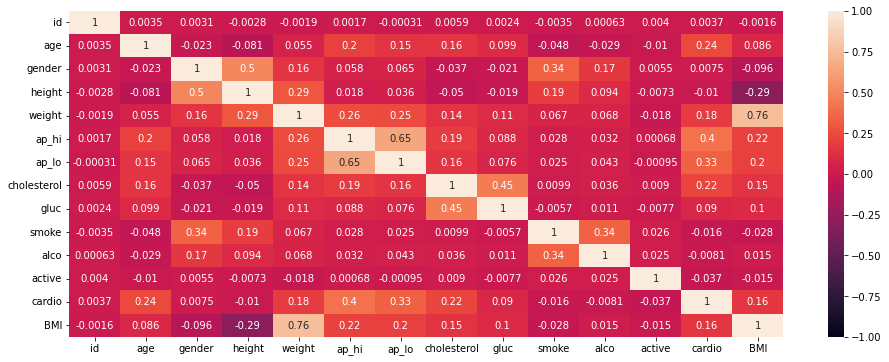

In [16]:
plt.figure(figsize=(16, 6))
sns.heatmap(df_modified.corr(), vmin=-1, vmax=1, annot=True)

In [17]:
#TODO:explain why they are correlated :
# BMI and height 
# BMI and weight 
# smoke and alco
# glucoz and cholesterol 
# height and gender 
# height and weight 

# 2.3 Create 2 datasets

In [18]:
df_discrete = df_modified.drop(["ap_hi","ap_lo","height","weight","BMI"],axis=1)

df_discrete.head()

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI Category,Blood pressure
0,0,18393,2,1,1,0,0,1,0,normal range,Stage 1 hypertension
1,1,20228,1,3,1,0,0,1,1,obese (class I),Stage 2 hypertension
2,2,18857,1,3,1,0,0,0,1,normal range,Stage 1 hypertension
3,3,17623,2,1,1,0,0,1,1,overweight,Stage 2 hypertension
4,4,17474,1,1,1,0,0,0,0,normal range,Healthy


In [19]:
df_discrete_onehot = pd.get_dummies(df_discrete, columns = ["gender", "BMI Category", "Blood pressure"], drop_first=True)

df_discrete_onehot.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,gender_2,BMI Category_obese (class I),BMI Category_obese (class II),BMI Category_obese (class III),BMI Category_overweight,Blood pressure_Healthy,Blood pressure_Hypertension crisis,Blood pressure_Stage 1 hypertension,Blood pressure_Stage 2 hypertension
0,0,18393,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0
1,1,20228,3,1,0,0,1,1,0,1,0,0,0,0,0,0,1
2,2,18857,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,3,17623,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1
4,4,17474,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
df_continuous = df_modified.drop(["BMI Category", "Blood pressure","height","weight"],axis=1)

df_continuous.head()


,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,100,60,1,1,0,0,0,0,23.011177


In [21]:
df_continuous_onehot = pd.get_dummies(df_continuous,columns=["gender"], drop_first=True)

df_continuous_onehot.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_2
0,0,18393,110,80,1,1,0,0,1,0,21.967120,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,0


# 2.4 Chosing models 

In [22]:
#TODO: Try : RandomForest,SVM,KNN,LogisticRegression

In [23]:
# train test split 
from sklearn.model_selection import train_test_split

#splitting data into X and y : discrete data
X_d = df_discrete_onehot.drop("cardio",axis = 1)
y_d = df_discrete_onehot[["cardio"]]

#splitting data into X and y : continuous data
X_c = df_continuous_onehot.drop("cardio",axis = 1)
y_c = df_continuous_onehot[["cardio"]]

#train validation test split : discrete data
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_d,y_d,test_size=.4)
X_val_d,X_test_d,y_val_d,y_test_d = train_test_split(X_test_d,y_test_d,test_size=.5)

#train validation test split : continuous data
X_train_c,X_test_c,y_train_c,y_test_c = train_test_split(X_c,y_c,test_size=.4)
X_val_c,X_test_c,y_val_c,y_test_c = train_test_split(X_test_c,y_test_c,test_size=.5)

#print the shapes
print("Discrete dataframe : ")
print(f"Shapes of train data : {X_train_d.shape} and {y_train_d.shape}")
print(f"Shapes of validation data : {X_val_d.shape} and {y_val_d.shape}")
print(f"Shapes of test data : {X_test_d.shape} and {y_test_d.shape}")

print("\nContinuous dataframe : ")
print(f"Shapes of train data : {X_train_c.shape} and {y_train_c.shape}")
print(f"Shapes of validation data : {X_val_c.shape} and {y_val_c.shape}")
print(f"Shapes of test data : {X_test_c.shape} and {y_test_c.shape}")

Discrete dataframe : 
Shapes of train data : (41398, 16) and (41398, 1)
Shapes of validation data : (13799, 16) and (13799, 1)
Shapes of test data : (13800, 16) and (13800, 1)

Continuous dataframe : 
Shapes of train data : (41398, 11) and (41398, 1)
Shapes of validation data : (13799, 11) and (13799, 1)
Shapes of test data : (13800, 11) and (13800, 1)


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC


scaling_methods = ["Normalization","Standardization"]
model_names = ['DecisionTree','RandomForest','SVM','KNN','LogisticRegression']
model_objects = [DecisionTreeRegressor(),RandomForestRegressor(),SVC(),KNeighborsClassifier(),LogisticRegression()]
data = [[X_train_d,X_test_d,y_train_d,y_test_d],[X_train_c,X_test_c,y_train_c,y_test_c]]


param_grids = []
classifiers_data = [] 

#combining all scaling methods, models and different dataframes together
for scaling_method in ["Normalization","Standardization"]:
    for (index,model_name),model_object in zip(enumerate(model_names),model_objects) : 
        for i,d in enumerate([[X_train_d,X_test_d,y_train_d,y_test_d],[X_train_c,X_test_c,y_train_c,y_test_c]]):
            if i == 0 : 
                dataframe = "Discrete"
            else : 
                dataframe = "Continuous"
            classifiers_data.append([scaling_method,model_name,model_object,dataframe,d[0],d[1],d[2],d[3],index])

pipeline_list = []
classifiers = []

#TRYING THINGS MANUALLY FIRST

clf = ["Normalization",'DecisionTree',DecisionTreeRegressor(),"Discrete",X_train_c,X_test_c,y_train_c,y_test_c]

scaler = MinMaxScaler() if clf[0]=="Normalization" else StandardScaler()
model_name = clf[1]
model_object = clf[2]
X_train_data,X_test_data,y_train_data,y_test_data = clf[4],clf[5],clf[6],clf[7]
param_grid = {
                "max_depth": [2+ 2*i for i in range(5)],
                "min_samples": [1+4*i for i in range(5)],
                "min_weight_fraction": np.arange(0, 0.5, 0.1),
            }

#current_pipeline = Pipeline([("scaler", scaler), 
#                                (model_name, model_object)])


current_clf = GridSearchCV(
                            estimator=Pipeline([("scaler", MinMaxScaler()), 
                                                ("KNN", KNeighborsClassifier())]),
                            cv=3,
                            scoring="accuracy",
                            verbose=1,
                            param_grid={ "KNN__n_neighbors": range(0,200,20) }
                            )

current_clf.fit(X_train_data,y_train_data)


'''#looping through the classifier data 
for clf in classifiers_data : 

    scaler = MinMaxScaler() if clf[0]=="Normalization" else StandardScaler()
    model_name = clf[1]
    model_object = clf[2]
    X_train_data,X_test_data,y_train_data,y_test_data = clf[4],clf[5],clf[6],clf[7]
    param_grid_index = clf[-1]
    param_grid = param_grid_list[param_grid_index]

    current_pipeline = Pipeline([("scaler", scaler), 
                                    (model_name, model_object)])
    

    current_clf = GridSearchCV(estimator = current_pipeline, 
                                param_grid = param_grid,
                                cv = 5, 
                                scoring = "recall", 
                                n_jobs = -1,
                                verbose = 1
                            )

    current_clf.fit(X_train_data,y_train_data)'''
    





Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .................................KNN__n_neighbors=0; total time=   0.3s
[CV] END .................................KNN__n_neighbors=0; total time=   0.2s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END .................................KNN__n_neighbors=0; total time=   0.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=20; total time=   7.3s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=20; total time=   5.5s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=20; total time=  11.7s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=40; total time=   6.4s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=40; total time=   6.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=40; total time=   6.4s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=60; total time=   6.2s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=60; total time=   6.5s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=60; total time=   7.9s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=80; total time=   6.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=80; total time=   7.9s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ................................KNN__n_neighbors=80; total time=   7.9s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=100; total time=   7.2s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=100; total time=   7.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=100; total time=   8.2s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=120; total time=   6.3s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=120; total time=   8.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=120; total time=   8.0s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=140; total time=   7.3s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=140; total time=   8.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=140; total time=   9.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=160; total time=   7.0s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=160; total time=   9.1s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=160; total time=   9.0s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=180; total time=   9.2s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=180; total time=   9.6s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[CV] END ...............................KNN__n_neighbors=180; total time=  10.5s


/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Sami/.local/share/virtualenvs/Machine-Learning-SAMI-FATMI-6_LropDT/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_pa

'#looping through the classifier data \nfor clf in classifiers_data : \n\n    scaler = MinMaxScaler() if clf[0]=="Normalization" else StandardScaler()\n    model_name = clf[1]\n    model_object = clf[2]\n    X_train_data,X_test_data,y_train_data,y_test_data = clf[4],clf[5],clf[6],clf[7]\n    param_grid_index = clf[-1]\n    param_grid = param_grid_list[param_grid_index]\n\n    current_pipeline = Pipeline([("scaler", scaler), \n                                    (model_name, model_object)])\n    \n\n    current_clf = GridSearchCV(estimator = current_pipeline, \n                                param_grid = param_grid,\n                                cv = 5, \n                                scoring = "recall", \n                                n_jobs = -1,\n                                verbose = 1\n                            )\n\n    current_clf.fit(X_train_data,y_train_data)'

In [25]:
current_clf.estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'KNN', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'KNN__algorithm', 'KNN__leaf_size', 'KNN__metric', 'KNN__metric_params', 'KNN__n_jobs', 'KNN__n_neighbors', 'KNN__p', 'KNN__weights'])

In [29]:
current_clf.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('KNN', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'KNN': KNeighborsClassifier(n_neighbors=20),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 20,
 'KNN__p': 2,
 'KNN__weights': 'uniform'}